In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanic.csv", index_col = 0)

In [4]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
data.shape


(891, 11)

In [10]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

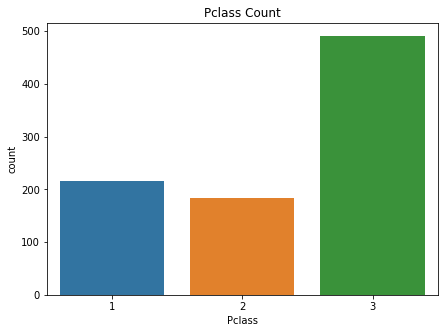

In [12]:
fig,ax=plt.subplots(figsize=(7,5))
sns.countplot(data=data,x='Pclass',ax=ax)
plt.title("Pclass Count")
plt.show()

In [13]:
data['Survived'].value_counts()
#0은 사망자, 1은 생존자

0    549
1    342
Name: Survived, dtype: int64

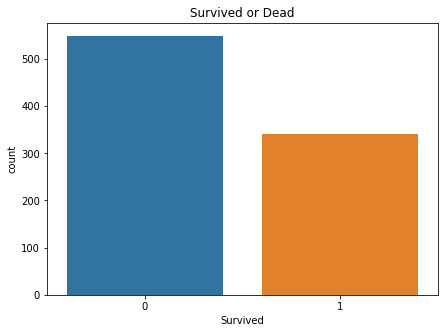

In [14]:
fig,ax=plt.subplots(figsize=(7,5))
sns.countplot(data=data,x='Survived',ax=ax)
plt.title("Survived or Dead")
plt.show()

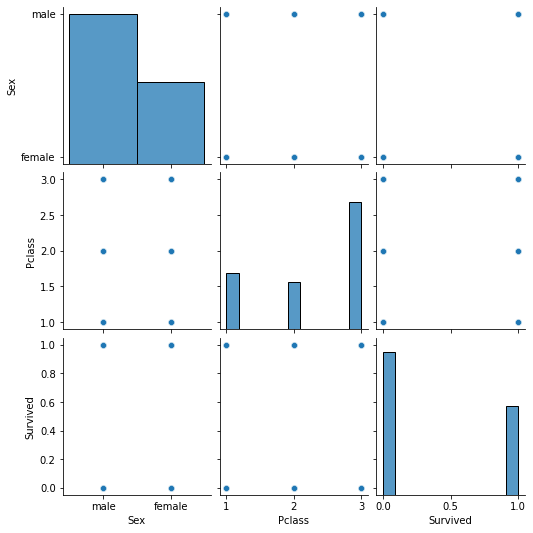

In [15]:
sns.pairplot(data,
             vars=['Sex', 'Pclass', 'Survived'],)
plt.show()

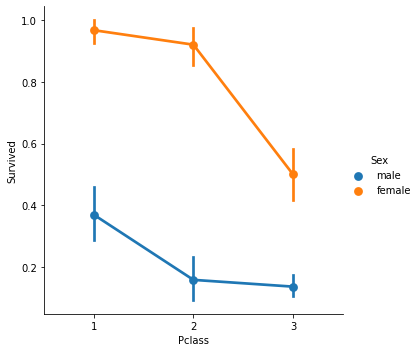

In [16]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data= data)
plt.show()

In [110]:
train_data= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanic.csv", index_col = 0)
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanic.csv", index_col = 0)

In [111]:
test_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [112]:
test_data=test_data.iloc[473:891]

In [113]:
print(test_data.shape)

(418, 11)


In [114]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
Survived      0
Pclass        0
Name          0
Sex           0
Age          81
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       319
Embarked      1
dtype: int64


In [115]:
train_data.dropna(axis=0)#행
train_data.dropna(axis=1)#열
test_data.dropna(axis=0)
test_data.dropna(axis=1)

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,,,
474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,0,0,SC/AH Basle 541,13.7917
475,0,3,"Strandberg, Miss. Ida Sofia",female,0,0,7553,9.8375
476,0,1,"Clifford, Mr. George Quincy",male,0,0,110465,52.0000
477,0,2,"Renouf, Mr. Peter Henry",male,1,0,31027,21.0000
478,0,3,"Braund, Mr. Lewis Richard",male,1,0,3460,7.0458
...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500


In [121]:
train_data['Age'].fillna(train_data.groupby('Pclass')['Age'].transform('mean'), inplace=True)
train_data['Cabin'].fillna(train_data.groupby('Pclass')['Age'].transform('mean'), inplace=True)
test_data['Age'].fillna(test_data.groupby('Pclass')['Age'].transform('mean'), inplace=True)
test_data['Cabin'].fillna(test_data.groupby('Pclass')['Age'].transform('mean'), inplace=True)

In [146]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
dtype: int64
Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    1
dtype: int64


In [148]:
train_target = pd.DataFrame(train_data.Survived, columns = ['Survived'])
test_target = pd.DataFrame(test_data.Survived, columns = ['Survived'])

In [149]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

In [157]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_data)
train_scaled = ss.transform(train_data)
test_scaled = ss.transform(test_data)

ValueError: ignored

In [128]:
print("X_train.shape :", X_train.shape)

print("y_train.shape :", y_train.shape)

print("X_test.shape:", X_test.shape)

print("y_test.shape:", y_test.shape)

X_train.shape : (668, 10)
y_train.shape : (668,)
X_test.shape: (223, 10)
y_test.shape: (223,)


In [ ]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(train_scaled, train_target)

pred_svm = clf_svm.predict(test_scaled)

print("\n--- SVM Classifier ---")
print(accuracy_score(test_target, pred_svm))
print(confusion_matrix(test_target, pred_svm))

In [ ]:
print ("\n--- KNN ---")
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
pred = kn.predict(test_scaled)
print(accuracy_score(test_target,pred))
print (confusion_matrix(test_target, pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(train_scaled, train_target)
pred = rf_clf.predict(test_scaled)
print(accuracy_score(test_target,pred))
print (confusion_matrix(test_target, pred))

In [ ]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(train_scaled, train_target)

pred_lr = clf_lr.predict(test_scaled)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(test_target, pred_lr))
print (confusion_matrix(test_target, pred_lr))

In [158]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(train_scaled, train_target)

pred_nn = clf_nn.predict(test_scaled)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(test_target, pred_nn))
print (confusion_matrix(test_target, pred_nn))

NameError: ignored

In [ ]:
#여기까지

In [123]:
df_data=train_data.drop('Embarked',axis=1).values
df_target=train_data['Embarked'].values
X_train, X_test, y_train, y_test = train_test_split(df_data,df_target,test_size=0.25)

In [ ]:
# Survived를 타겟 레이블로 삼아서 EDA 수행

# 1. Plass 레이블별 갯수 및 차트표시

# 2. 생존자와 사망자 총 숫자 및 차트표시

# 3. 성별, 티켓클래스(Pclass), 생존여부(Survived) 상관관계 분석

# 4. X_train, y_ytrain, X_test, y_test로 나누고 생존여부(Survived)에 따라 각각 분류(SVM, LR, DT, RT, KNN) 수행

